In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Exploration of DecisionTree Hyperparameters with Binary Target Variable

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import numpy as np
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc

<IPython.core.display.Javascript object>

In [3]:
# Read in csv of data which has already undergone feature engineering
data = pd.read_csv("../5_profiles/reduced_dim_5.csv")

<IPython.core.display.Javascript object>

In [4]:
# Create column representing the Frontend profile as a binary variable
data["Frontend"] = np.where(data["profile"] == "Frontend", 1, 0)

<IPython.core.display.Javascript object>

In [5]:
# Set skills as the input variable
X = data.iloc[:, 1:-1]

# Set the Frontend profile as the target variable
y = data.iloc[:, -1]

<IPython.core.display.Javascript object>

In [6]:
# Split to training and testing sets
x_train, x_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

<IPython.core.display.Javascript object>

In [24]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

<IPython.core.display.Javascript object>

In [25]:
# Establishing Baseline/Benchmark
y_pred = dt.predict(x_test)
print(
    "Accuracy of logistic regression classifier on test set: {:.2f}".format(
        dt.score(x_test, y_test)
    )
)

Accuracy of logistic regression classifier on test set: 0.83


<IPython.core.display.Javascript object>

# max_depth: 
If this argument is set to None, then branches are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. The longer the branch, the deeper the tree. Trees of greater depths are capable of capturing more information about our data. 
<br>However, the greater the depth of the tree, the more prone to overfitting it is. This causes it to perform poorly in making predictions when presented with new data. Therefore, there is an optimal depth at which the tree performs its best, and after which, performance will randomly oscilate.

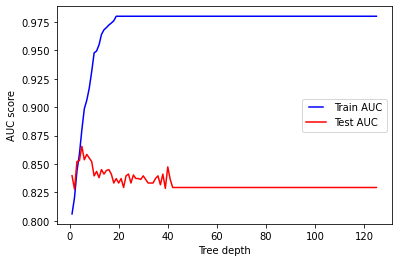

<IPython.core.display.Javascript object>

In [30]:
max_depths = np.linspace(1, 125, 125, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

(line1,) = plt.plot(max_depths, train_results, "b", label="Train AUC")
(line2,) = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

This indicates that our model performs best at a tree-depth of about 10. Thereafter, performance may randomly improve, but given the stochastic nature of the Decision Tree algorithm, it's not possible to draw any conclusions reagrding performance enhancement after a tree depth = 10.

# min_samples_split: 
represents the minimum number of samples required to split an interal node. Playing with max_depth and with this parameter could regularise (i.e. generalize) the individual trees if needed

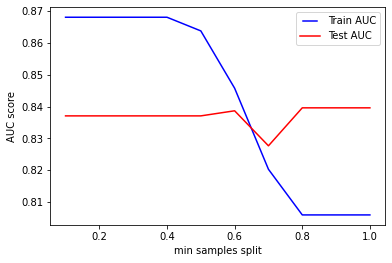

<IPython.core.display.Javascript object>

In [31]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=0)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

(line1,) = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
(line2,) = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

In [14]:
# how would you interpret this result? Does this mean that the optimum number of splits would be 80%?

<IPython.core.display.Javascript object>

# min_samples_leaf:
represents the minimum number of samples required at leaf, i.e. node at the bottom of the tree. Runing this parameter can help reduce over-fitting as well and increase interpretability of the tree by reducing the possible number of paths to leaf nodes.

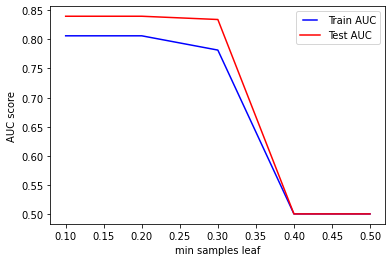

<IPython.core.display.Javascript object>

In [32]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=0)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

(line1,) = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
(line2,) = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

So including 35% of samples be includes with the leaf node is the last amount which yields comparable performance, after which performance sees a marked decrease.

# max_features:
is the number of features considered in the process of finding the best split
For classification problems, a good default value is max_features = sqrt(n_features), which would be equal to 10-11 features in our case.

<function matplotlib.pyplot.show(close=None, block=None)>

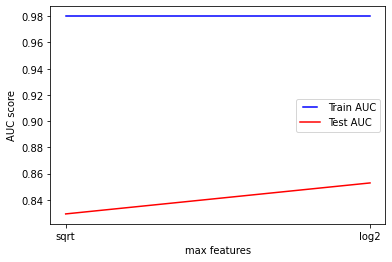

<IPython.core.display.Javascript object>

In [35]:
max_features = ["sqrt", "log2"]

train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature, random_state=0)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

(line1,) = plt.plot(max_features, train_results, "b", label="Train AUC")
(line2,) = plt.plot(max_features, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show

In [39]:
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=10,
    max_features=10,
    max_leaf_nodes=None,
    min_samples_leaf=20,
    min_samples_split=20,
    random_state=0,
    splitter="best",
)

<IPython.core.display.Javascript object>

In [40]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=10, min_samples_leaf=20,
                       min_samples_split=20, random_state=0)

<IPython.core.display.Javascript object>

In [41]:
# Establishing Baseline/Benchmark
y_pred = dt.predict(x_test)
print(
    "Accuracy of logistic regression classifier on test set: {:.2f}".format(
        dt.score(x_test, y_test)
    )
)

Accuracy of logistic regression classifier on test set: 0.85


<IPython.core.display.Javascript object>

### Splitter: Best v. Random
 - When given a dataset consisting of hundreds of features, the **best** splitter is best as it calculates the best features to split on based on the impurity measure and will use that measure to split the tree's nodes (branches).
 - On the other hand, the **random** splitter splits the tree's nodes by randomly selecting a set of features. Should your model be overfit to the data, the additional randomness provided by this option may help.